In [22]:
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
import torch
from PIL import Image


In [23]:
img = Image.open('../test/H0011_u.jpg') #03 y 04
transform = transforms.ToTensor()

In [24]:
imgTensor = transform(img)
size = 512
train_transforms = transforms.Compose([
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
            transforms.RandomChoice([
                transforms.RandomRotation(degrees=5),
                transforms.RandomResizedCrop(size=size, scale=(0.4, 0.9)),
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(),
                transforms.Compose([
                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
                ])
            ]),
             transforms.Resize((size,size))
        ])
         

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


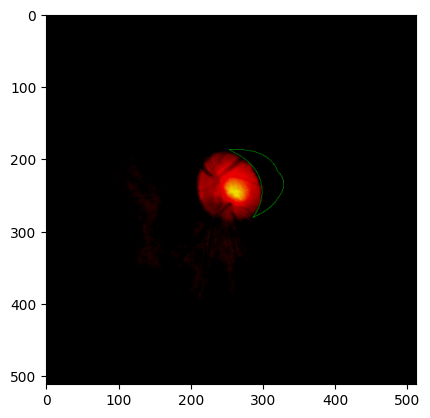

In [25]:
plt.imshow(train_transforms(imgTensor).permute(1, 2, 0))